# Brownian Motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def quadratic_variation(X):
    return np.cumsum(np.power(np.diff(X, axis=0, prepend=0.), 2), axis=0)

In [3]:
def main():
    n = 10000 # iteration number
    d = 1 # number of Brownian motion (samples)
    T = 1.
    times = np.linspace(0.,T,n)
    dt = times[1]-times[0]
    # X_t2 - X_t1 ~ Normal with mean 0 and variance t2-t1
    dX = np.sqrt(dt) * np.random.normal(size=(n-1, d))
    X_0 = np.zeros(shape=(1, d))
    X = np.concatenate((X_0, np.cumsum(dX, axis=0)), axis=0)    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
    #ax1.set_title("")
    #ax2.set_title("Mean square displacement")
    ax1.set_xlabel("Time")
    ax2.set_xlabel("Time")
    ax1.set_ylabel("Displacement")
    ax2.set_ylabel("Mean square displacement")
    ax1.plot(times, X)
    ax2.plot(times, quadratic_variation(X))
    plt.show()

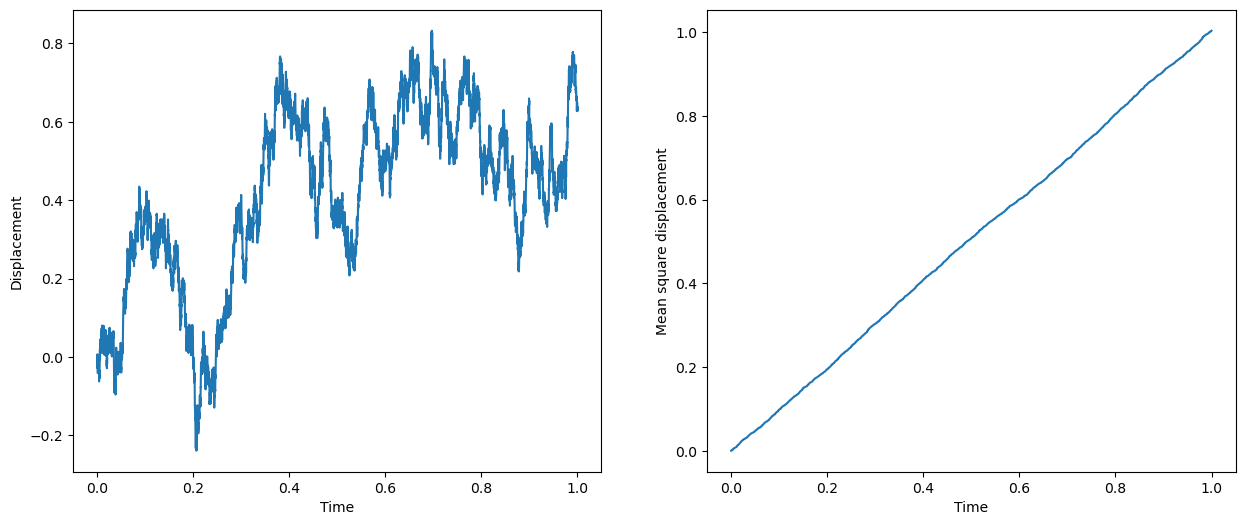

In [4]:
main()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [19]:
# Simulation parameters
n_steps = 10000  # Number of steps
time_step = 1   # Time step size
n_particles = 100  # Number of particles (for averaging)

# Generate random displacements
displacements = np.random.normal(0, np.sqrt(time_step), (n_particles, n_steps))

# Cumulative sum to simulate position over time (x(t))
positions = np.cumsum(displacements, axis=1)

# Time array
time = np.arange(n_steps) * time_step

# Calculate squared displacement and mean squared displacement (MSD)
squared_displacement = positions**2
msd = np.mean(squared_displacement, axis=0)

In [20]:
# Define the MSD fitting function (MSD = 2*D*t)
def msd_function(t, D):
    return D * t

# Fit the MSD to find the diffusion coefficient
params, covariance = curve_fit(msd_function, time, msd)
D = params[0]

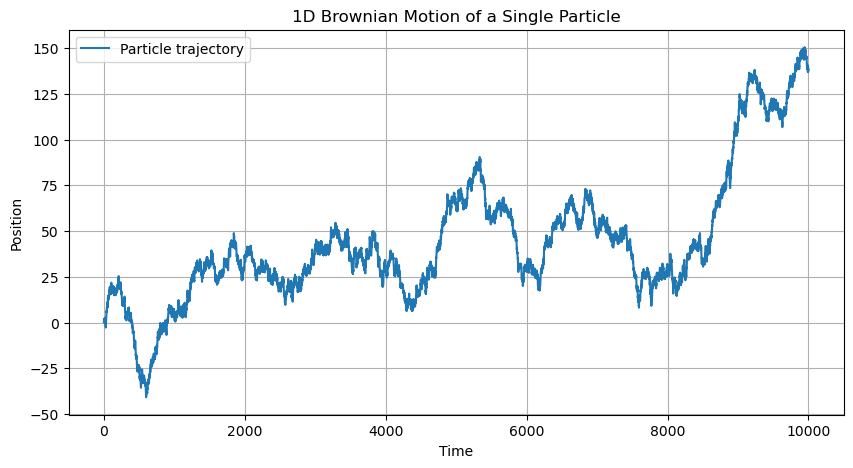

In [21]:
# Plot the Brownian motion for one particle
plt.figure(figsize=(10, 5))
plt.plot(time, positions[0], label='Particle trajectory')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('1D Brownian Motion of a Single Particle')
plt.grid()
plt.legend()
plt.show()

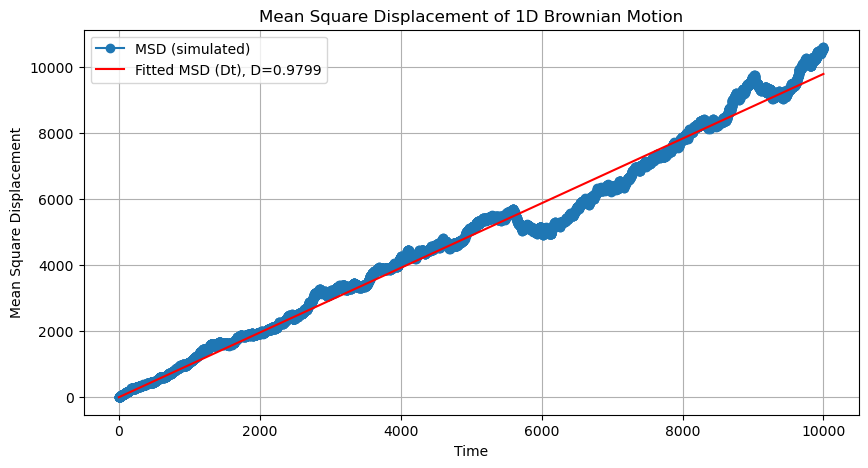

In [22]:
# Plot the MSD and the fitted curve
plt.figure(figsize=(10, 5))
plt.plot(time, msd, label='MSD (simulated)', marker='o')
plt.plot(time, msd_function(time, D), label=f'Fitted MSD (Dt), D={D:.4f}', color='red')
plt.xlabel('Time')
plt.ylabel('Mean Square Displacement')
plt.title('Mean Square Displacement of 1D Brownian Motion')
plt.legend()
plt.grid()
plt.show()

In [23]:
print(f"Fitted Diffusion Coefficient: D = {D:.4f}")

Fitted Diffusion Coefficient: D = 0.9799
